# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', parse_dates=['first_day_exposition'], sep='\t')

In [3]:
real_estate.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

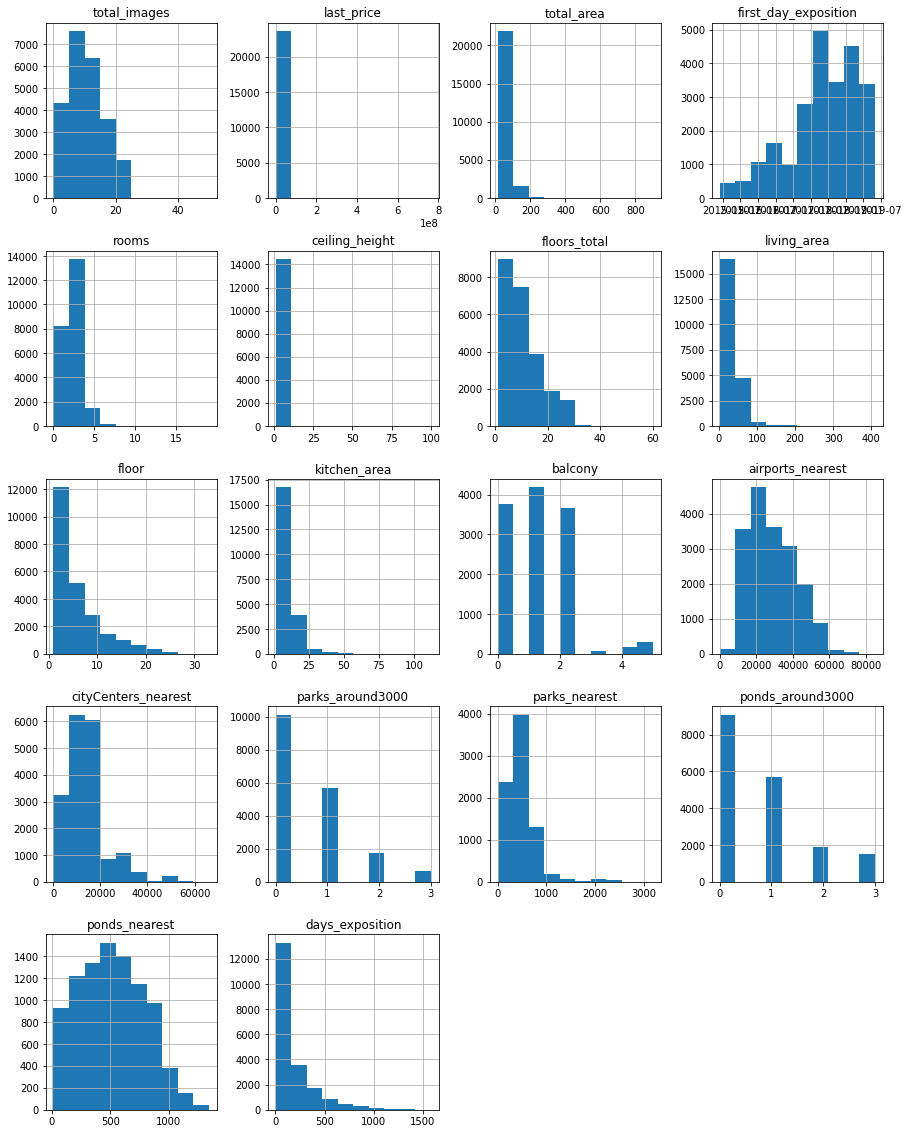

In [5]:
real_estate.hist(figsize=(15, 20));

### Выполните предобработку данных

In [6]:
real_estate.isnull().sum() / len(real_estate) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Пропуски есть в следующих столбцах:**

ceiling_height - скорее всего, владелец квартиры просто не указал. Пропущенных данных почти 39%, это очень большое количество данных. Логично заменить невозможно;

floors_total - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 1%, это небольшое количество данных. Логично заменить невозможно;

living_area - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 8%, это небольшое количество данных. Логично заменить невозможно;

is_apartment - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 88%, это критическое количество данных. Возможно заменить на значение True;

kitchen_area - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 9,5%, это небольшое количество данных. Логично заменить невозможно;

balcony - скорее всего, владелец квартиры не указал из-за того, что балкона нет. Пропущенных данных почти 49%, это очень большое количество данных. Заменим пропушенные значения на 0;

locality_name - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 1%, это небольшое количество данных. Логично заменить невозможно;

airports_nearest - скорее всего, владелец квартиры не указал из-за того, что аэропорта рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Замена значения NaN не имеет смысла;

cityCenters_nearest - скорее всего, владелец квартиры не указал из-за того, что квартира находится в центре. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

parks_around3000 - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

parks_nearest - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных почти 66%, это очень большое количество данных. Замена значения NaN не имеет смысла, т.к. из названия столбца parks_around3000 видно, что парк находится на расстоянии более 3 км и поэтому данных нет;

ponds_around3000 - скорее всего, владелец квартиры не указал из-за того, что пруда рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

ponds_nearest - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных почти 62%, это очень большое количество данных. Замена значения NaN не имеет смысла, т.к. из названия столбца ponds_around3000 видно, что парк находится на расстоянии более 3 км и поэтому данных нет;

days_exposition - скорее всего, данны некорректно перенеслись в архив. Количество таких пропусков около 13%. Логичной замены нет.

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

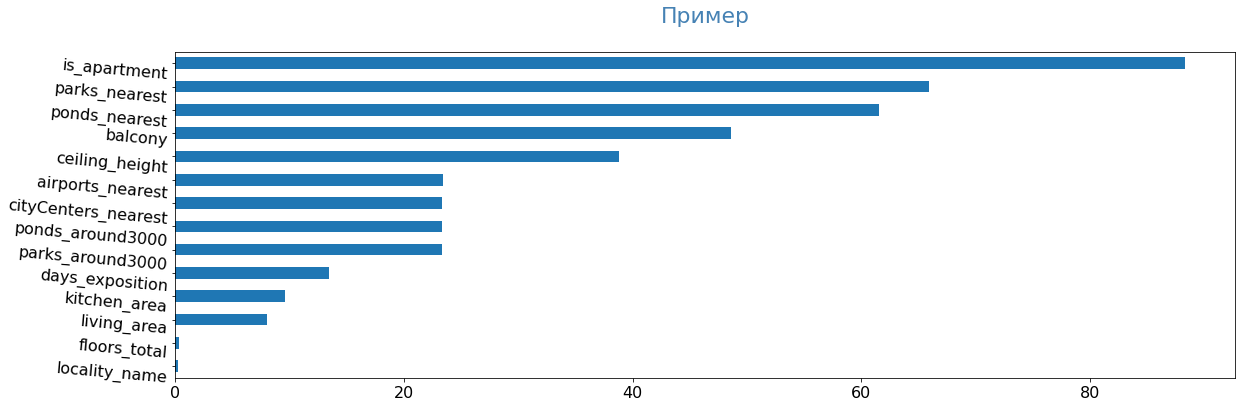

In [8]:
pass_value_barh(real_estate)

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения в %' + "\n"+'от общего количества данных', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

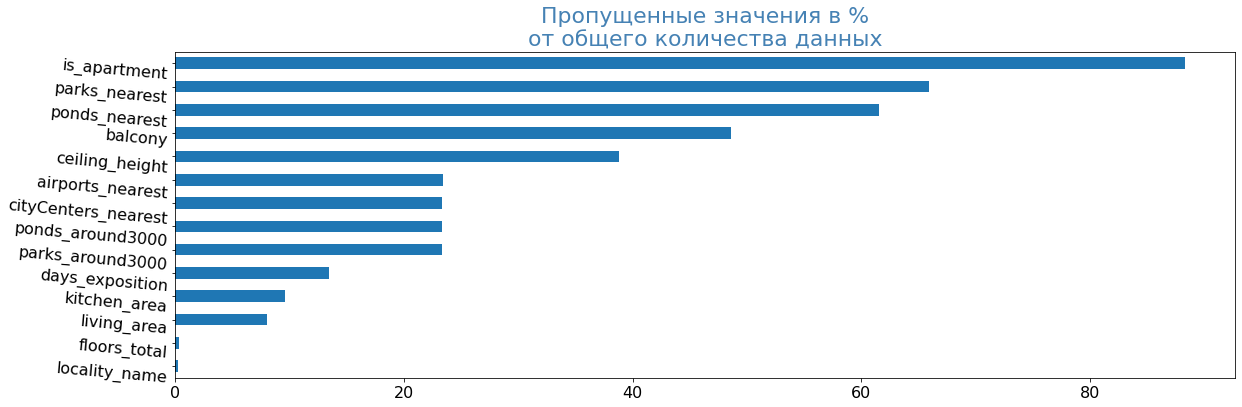

In [10]:
pass_value_barh(real_estate)

In [11]:
real_estate[['balcony', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']] = real_estate[['balcony', 
                                                                                                       'cityCenters_nearest',
                                                                                                       'parks_around3000', 
                                                                                                       'ponds_around3000'
                                                                                                      ]
                                                                                                     ].fillna(0)
real_estate['is_apartment'] = real_estate['is_apartment'].astype('bool')

In [12]:
real_estate.loc[real_estate['floors_total'].isna(), 'floors_total'] = real_estate.loc[real_estate['floors_total'].isna(), 
                                                                                      'floor'
                                                                                     ]

In [13]:
real_estate.isnull().sum() / len(real_estate) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.000000
living_area              8.029875
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest      0.000000
parks_around3000         0.000000
parks_nearest           65.909954
ponds_around3000         0.000000
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Некорректно отображается тип данных по столбцам first_day_exposition, floors_total, parks_around3000 и ponds_around3000. Присвоим этим столбцам корректные типы данных:**

first_day_exposition - формат даты, т.к. там записана дата;

floors_total - формат целого числа, т.к. пол этажа не может быть;

parks_around3000 - формат целого числа, т.к. количество парков не может быть десятичным числом;

ponds_around3000 - формат целого числа, т.к. количество прудов не может быть десятичным числом.

In [15]:
for column in ['floors_total', 'parks_around3000', 'ponds_around3000', 'balcony']:
    real_estate[column] = real_estate[column].astype('int')

In [16]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Выведим список уникальных данных в столбце locality_name. Посмотрим неявные дубликаты и устраним их. 

Видно, что есть значения nan, процент которых небольшой (меньше 1%). Их можно удалить.

In [17]:
real_estate_correct_local = real_estate.dropna(subset=['locality_name']).reset_index(drop=True)

In [18]:
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [19]:
real_estate_correct_local['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
real_estate_correct_local.loc[:, ['locality_type', 'locality_clean_name']] = real_estate_correct_local['locality_name'
                                                                                                      ].str.split(pat='(?=[A-Я])', 
                                                                                                                  n=1, 
                                                                                                                  expand=True
                                                                                                                 ).to_numpy()

In [21]:
real_estate_correct_local.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,locality_clean_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,посёлок,Шушары
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,городской посёлок Янино-1,NaN,0.0,0,NaN,0,NaN,55.0,городской посёлок,Янино-1
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,посёлок,Парголово
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,посёлок Мурино,NaN,0.0,0,NaN,0,NaN,189.0,посёлок,Мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,,Санкт-Петербург


In [22]:
real_estate_correct_local['locality_clean_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### check name

In [23]:
# check
real_estate_correct_local.locality_clean_name.nunique()

305

In [24]:
_duplicateRows = real_estate_correct_local[real_estate_correct_local.duplicated()]
len(_duplicateRows)

0

In [25]:
_duplicateRows = real_estate_correct_local[real_estate_correct_local.duplicated(['total_area', 'floors_total', 'floor',
                                                                                 'cityCenters_nearest', 'rooms',
                                                                                'locality_clean_name'
                                                                                ]
                                                                               )
                                          ]
len(_duplicateRows)

210

In [26]:
real_estate_correct_local = real_estate_correct_local.drop_duplicates(['total_area', 'floors_total', 'floor',
                                                                                 'cityCenters_nearest', 'rooms',
                                                                                'locality_clean_name'
                                                                      ]
                                                                     ).reset_index(drop=True)
_duplicateRows = real_estate_correct_local[real_estate_correct_local.duplicated(['total_area', 'floors_total', 'floor',
                                                                                 'cityCenters_nearest', 'rooms',
                                                                                'locality_clean_name'
                                                                                ]
                                                                               )
                                          ]
len(_duplicateRows)

0

### Проведите исследовательский анализ данных

**Проведем исследовательский анализ для столбца total_area.**

In [27]:
# check
import matplotlib.pyplot as plt

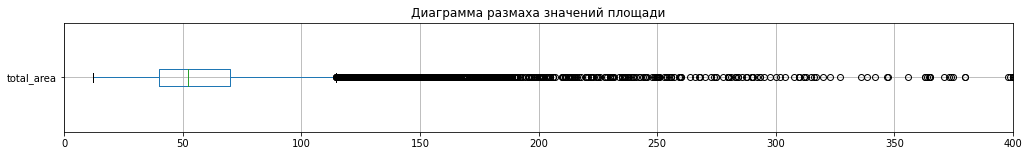

In [28]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = real_estate_correct_local[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

count    23440.000000
mean        60.379262
std         35.700291
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

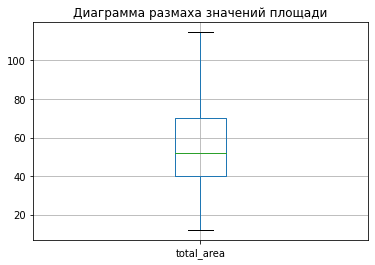

In [29]:
real_estate_correct_local.boxplot(column='total_area', showfliers=False).set(title='Диаграмма размаха значений площади')
real_estate_correct_local['total_area'].describe()

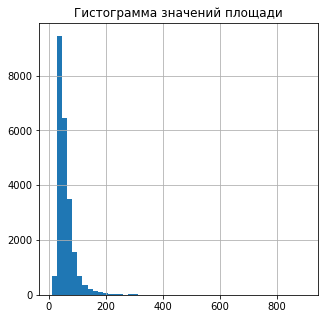

In [30]:
real_estate_correct_local['total_area'].hist(bins=50, figsize=(5, 5)).set(title='Гистограмма значений площади');

In [31]:
real_estate_correct_local = real_estate_correct_local.query('20 <= total_area <= 250')

In [32]:
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23302 entries, 0 to 23439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23302 non-null  int64         
 1   last_price            23302 non-null  float64       
 2   total_area            23302 non-null  float64       
 3   first_day_exposition  23302 non-null  datetime64[ns]
 4   rooms                 23302 non-null  int64         
 5   ceiling_height        14291 non-null  float64       
 6   floors_total          23302 non-null  int64         
 7   living_area           21459 non-null  float64       
 8   floor                 23302 non-null  int64         
 9   is_apartment          23302 non-null  bool          
 10  studio                23302 non-null  bool          
 11  open_plan             23302 non-null  bool          
 12  kitchen_area          21101 non-null  float64       
 13  balcony              

count    23302.000000
mean        59.063174
std         28.892260
min         20.000000
25%         40.000000
50%         52.000000
75%         69.167500
max        250.000000
Name: total_area, dtype: float64

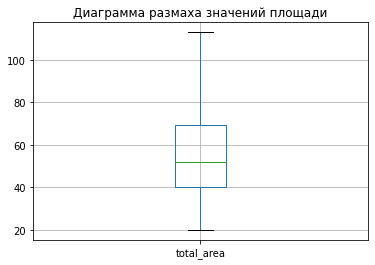

In [33]:
real_estate_correct_local.boxplot(column='total_area', showfliers=False).set(title='Диаграмма размаха значений площади')
real_estate_correct_local['total_area'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу total_area на значении 250 м2 (отсеев аномальные значения) медианное значение 52 м2. 

**Проведем исследовательский анализ для столбца living_area.**

count    21459.000000
mean        33.788382
std         18.942364
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

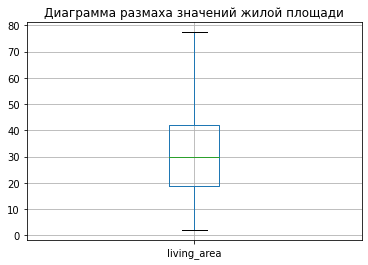

In [34]:
real_estate_correct_local.boxplot(column='living_area', showfliers=False).set(title='Диаграмма размаха значений жилой площади')
real_estate_correct_local['living_area'].describe()

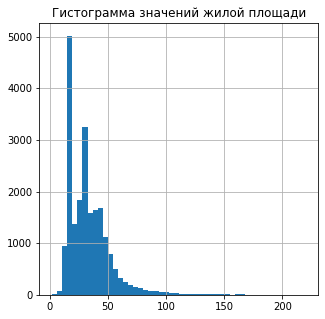

In [35]:
real_estate_correct_local['living_area'].hist(bins=50, figsize=(5, 5)).set(title='Гистограмма значений жилой площади');

#### check nan

In [36]:
# check
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23302 entries, 0 to 23439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23302 non-null  int64         
 1   last_price            23302 non-null  float64       
 2   total_area            23302 non-null  float64       
 3   first_day_exposition  23302 non-null  datetime64[ns]
 4   rooms                 23302 non-null  int64         
 5   ceiling_height        14291 non-null  float64       
 6   floors_total          23302 non-null  int64         
 7   living_area           21459 non-null  float64       
 8   floor                 23302 non-null  int64         
 9   is_apartment          23302 non-null  bool          
 10  studio                23302 non-null  bool          
 11  open_plan             23302 non-null  bool          
 12  kitchen_area          21101 non-null  float64       
 13  balcony              

In [37]:
real_estate_correct_local = real_estate_correct_local.query('10 <= living_area <= 100 or living_area.isna()')

In [38]:
# check
real_estate_correct_local.shape[0]

23016

In [39]:
real_estate_correct_local['living_area'] = real_estate_correct_local['living_area'].fillna(real_estate_correct_local['living_area']
                                                                                           .median()
                                                                                          )

In [40]:
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23016 entries, 0 to 23439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23016 non-null  int64         
 1   last_price            23016 non-null  float64       
 2   total_area            23016 non-null  float64       
 3   first_day_exposition  23016 non-null  datetime64[ns]
 4   rooms                 23016 non-null  int64         
 5   ceiling_height        14078 non-null  float64       
 6   floors_total          23016 non-null  int64         
 7   living_area           23016 non-null  float64       
 8   floor                 23016 non-null  int64         
 9   is_apartment          23016 non-null  bool          
 10  studio                23016 non-null  bool          
 11  open_plan             23016 non-null  bool          
 12  kitchen_area          20827 non-null  float64       
 13  balcony              

count    23016.000000
mean        32.457640
std         15.156214
min         10.000000
25%         19.000000
50%         30.000000
75%         40.400000
max        100.000000
Name: living_area, dtype: float64

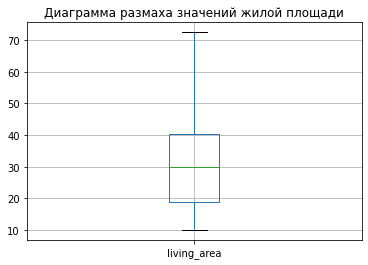

In [41]:
real_estate_correct_local.boxplot(column='living_area', showfliers=False).set(title='Диаграмма размаха значений жилой площади')
real_estate_correct_local['living_area'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу living_area на значениях 10 м2 и 100 м2 (отсеев аномальных значений) медианное значение не меняется и остается на 30 м2. 

**Проведем исследовательский анализ для столбца kitchen_area.**

count    20827.000000
mean        10.349245
std          5.394213
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

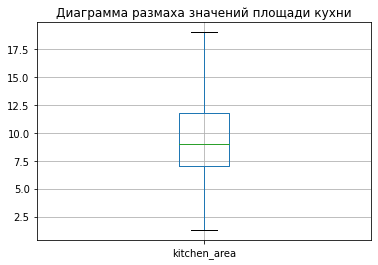

In [42]:
real_estate_correct_local.boxplot(column='kitchen_area', showfliers=False).set(title='Диаграмма размаха значений площади кухни')
real_estate_correct_local['kitchen_area'].describe()

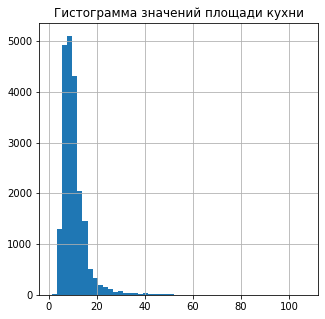

In [43]:
real_estate_correct_local['kitchen_area'].hist(bins=50, figsize=(5, 5)).set(title='Гистограмма значений площади кухни');

In [44]:
real_estate_correct_local = real_estate_correct_local.query('5 <= kitchen_area <= 40 or kitchen_area.isna()')

In [45]:
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22822 entries, 0 to 23439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22822 non-null  int64         
 1   last_price            22822 non-null  float64       
 2   total_area            22822 non-null  float64       
 3   first_day_exposition  22822 non-null  datetime64[ns]
 4   rooms                 22822 non-null  int64         
 5   ceiling_height        13946 non-null  float64       
 6   floors_total          22822 non-null  int64         
 7   living_area           22822 non-null  float64       
 8   floor                 22822 non-null  int64         
 9   is_apartment          22822 non-null  bool          
 10  studio                22822 non-null  bool          
 11  open_plan             22822 non-null  bool          
 12  kitchen_area          20633 non-null  float64       
 13  balcony              

count    20633.000000
mean        10.196760
std          4.577419
min          5.000000
25%          7.000000
50%          9.000000
75%         11.800000
max         40.000000
Name: kitchen_area, dtype: float64

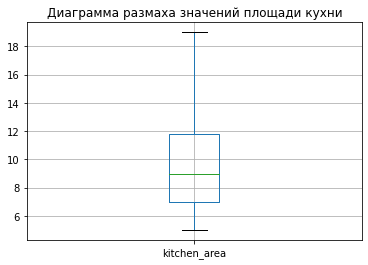

In [46]:
real_estate_correct_local.boxplot(column='kitchen_area', showfliers=False).set(title='Диаграмма размаха значений площади кухни')
real_estate_correct_local['kitchen_area'].describe()

In [47]:
real_estate_correct_local['kitchen_area'] = real_estate_correct_local['kitchen_area'].fillna(real_estate_correct_local['kitchen_area'].
                                                                                             median()
                                                                                            )

count    22822.000000
mean        10.081971
std          4.366597
min          5.000000
25%          7.300000
50%          9.000000
75%         11.200000
max         40.000000
Name: kitchen_area, dtype: float64

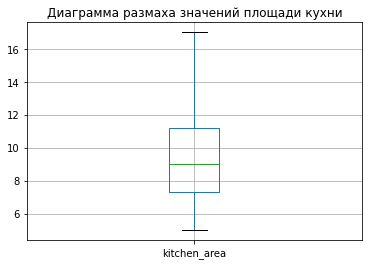

In [48]:
real_estate_correct_local.boxplot(column='kitchen_area', showfliers=False).set(title='Диаграмма размаха значений площади кухни')
real_estate_correct_local['kitchen_area'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу kitchen_area на значениях 5 м2 и 40 м2 (отсеев аномальных значений) медианное значение не меняется и остается на 9 м2. Далее заполняем пропуски медианными значением получаем вышеприведенное распределение. 

**Проведем исследовательский анализ для столбца last_price.**

count    2.282200e+04
mean     5.862572e+06
std      5.746505e+06
min      4.300000e+05
25%      3.430000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.300000e+08
Name: last_price, dtype: float64

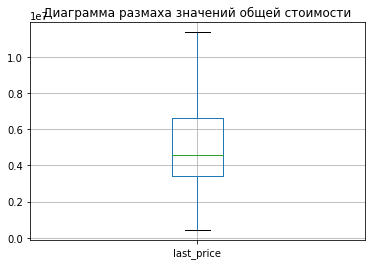

In [49]:
real_estate_correct_local.boxplot(column='last_price', showfliers=False).set(title='Диаграмма размаха значений общей стоимости')
real_estate_correct_local['last_price'].describe()

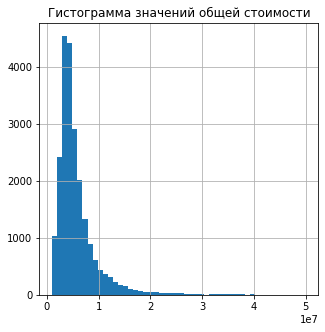

In [50]:
real_estate_correct_local['last_price'].hist(bins=50, figsize=(5, 5), 
                                             range=(1000000, 50000000)
                                            ).set(title='Гистограмма значений общей стоимости');

In [51]:
real_estate_correct_local = real_estate_correct_local.query('1000000 <= last_price <= 25000000')

In [52]:
real_estate_correct_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22378 entries, 0 to 23439
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22378 non-null  int64         
 1   last_price            22378 non-null  float64       
 2   total_area            22378 non-null  float64       
 3   first_day_exposition  22378 non-null  datetime64[ns]
 4   rooms                 22378 non-null  int64         
 5   ceiling_height        13719 non-null  float64       
 6   floors_total          22378 non-null  int64         
 7   living_area           22378 non-null  float64       
 8   floor                 22378 non-null  int64         
 9   is_apartment          22378 non-null  bool          
 10  studio                22378 non-null  bool          
 11  open_plan             22378 non-null  bool          
 12  kitchen_area          22378 non-null  float64       
 13  balcony              

count    2.237800e+04
mean     5.552698e+06
std      3.424738e+06
min      1.000000e+06
25%      3.450000e+06
50%      4.600000e+06
75%      6.500000e+06
max      2.500000e+07
Name: last_price, dtype: float64

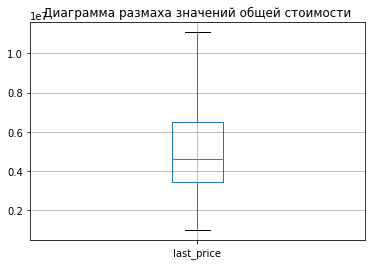

In [53]:
real_estate_correct_local.boxplot(column='last_price', showfliers=False).set(title='Диаграмма размаха значений общей стоимости')
real_estate_correct_local['last_price'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу last_price на значениях 1 млн и 25 млн (отсеев аномальных значений) медианное значение 4.6 млн. 

**Проведем исследовательский анализ для столбца rooms.**

count    22378.000000
mean         2.005541
std          0.956051
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

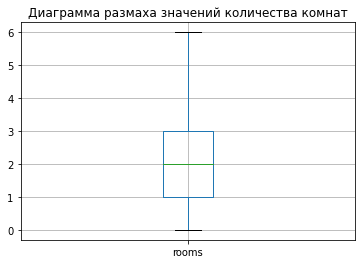

In [54]:
real_estate_correct_local.boxplot(column='rooms', showfliers=False).set(title='Диаграмма размаха значений количества комнат')
real_estate_correct_local['rooms'].describe()

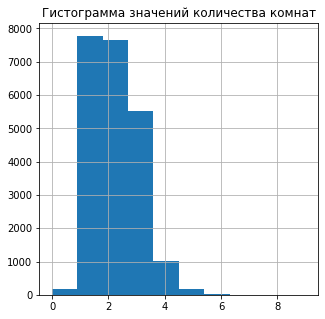

In [55]:
real_estate_correct_local['rooms'].hist(figsize=(5, 5)).set(title='Гистограмма значений количества комнат');

In [56]:
real_estate_correct_local = real_estate_correct_local.query('rooms <= 6')

count    22370.000000
mean         2.003666
std          0.950980
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

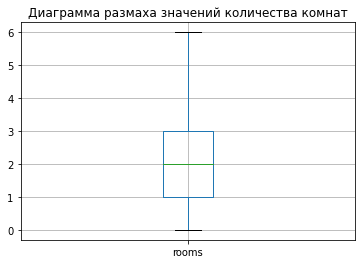

In [57]:
real_estate_correct_local.boxplot(column='rooms', showfliers=False).set(title='Диаграмма размаха значений количества комнат')
real_estate_correct_local['rooms'].describe()

Из графика видно, что аномальные значения при количестве комнат больше 6, поэтому отсеем эти значения. Медианное значение равно 2.

**Проведем исследовательский анализ для столбца ceiling_height.**

count    13715.000000
mean         2.757466
std          1.290440
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

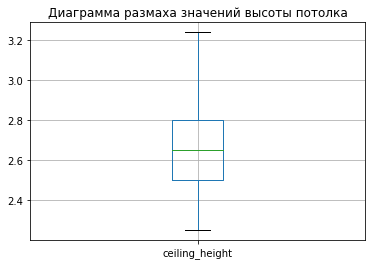

In [58]:
real_estate_correct_local.boxplot(column='ceiling_height',
                                  showfliers=False).set(title='Диаграмма размаха значений высоты потолка')
real_estate_correct_local['ceiling_height'].describe()

In [59]:
real_estate_correct_local.loc[real_estate_correct_local['ceiling_height'] > 10, 'ceiling_height'] /= 10

count    13715.000000
mean         2.711571
std          0.277788
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

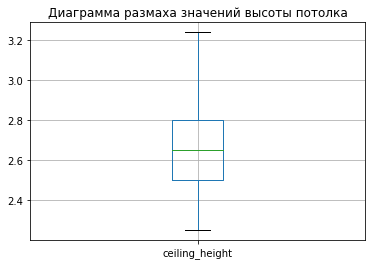

In [60]:
real_estate_correct_local.boxplot(column='ceiling_height',
                                  showfliers=False).set(title='Диаграмма размаха значений высоты потолка')
real_estate_correct_local['ceiling_height'].describe()

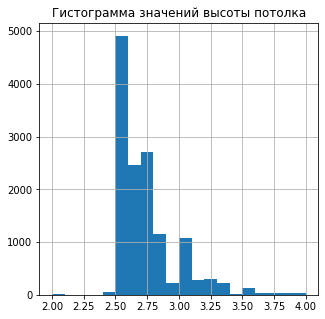

In [61]:
real_estate_correct_local['ceiling_height'].hist(bins=20, figsize=(5, 5), 
                                                range=(2, 4)).set(title='Гистограмма значений высоты потолка');

In [62]:
real_estate_correct_local = real_estate_correct_local.query('2.4 <= ceiling_height <= 3.5 or ceiling_height.isna()')

count    13495.000000
mean         2.694718
std          0.211752
min          2.400000
25%          2.500000
50%          2.650000
75%          2.780000
max          3.500000
Name: ceiling_height, dtype: float64

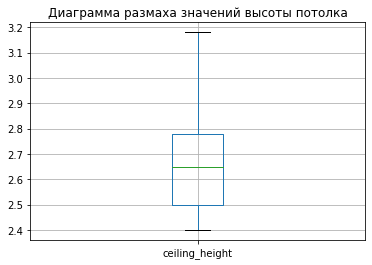

In [63]:
real_estate_correct_local.boxplot(column='ceiling_height',
                                  showfliers=False).set(title='Диаграмма размаха значений высоты потолка')
real_estate_correct_local['ceiling_height'].describe()

In [64]:
real_estate_correct_local['ceiling_height'] = real_estate_correct_local['ceiling_height'].fillna(real_estate_correct_local['ceiling_height'].
                                                                                                 median()
                                                                                                )

count    22150.000000
mean         2.677245
std          0.166714
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

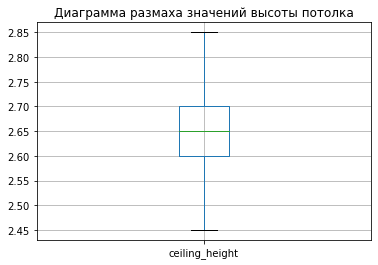

In [65]:
real_estate_correct_local.boxplot(column='ceiling_height',
                                  showfliers=False).set(title='Диаграмма размаха значений высоты потолка')
real_estate_correct_local['ceiling_height'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу ceiling_height на значениях 2.4 м и 3.5 м (отсеев аномальных значений) медианное значение не меняется и остается на 2.65 м. Далее заполняем пропуски медианными значением получаем вышеприведенное распределение. 

***Создадим дополнительный столбец для анализа данных по столбцу floor, в который поместим значения: Первый, если значения столбца floor = 1; Другой, если значение столбца 1 < floor < floors_total, и Последний, если значения столбца floor = floors_total.***

In [66]:
def floor_type(row):
    try:
        if row['floor'] == 1:
            return '1_первый'
        elif row['floor'] == row['floors_total']:
            return '3_последний'
        elif row['floor'] < 0:
            if abs(row['floor']) == 1:
                return '1_первый'
            elif abs(row['floor']) == row['floors_total']:
                return '3_последний'
            else:
                return '2_другой'
        elif row['floor'] == 0:
            return '1_первый'
        else:
            return '2_другой'
    except:
        pass

real_estate_correct_local['floor_type'] = real_estate_correct_local.apply(floor_type, axis=1)

In [67]:
real_estate_correct_local.loc[real_estate_correct_local['floors_total'] == real_estate_correct_local['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,locality_clean_name,floor_type
12,10,3890000.0,54.0,2016-06-30,2,2.65,5,30.0,5,True,...,NaN,0.0,0,NaN,0,NaN,90.0,,Сертолово,3_последний
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,37868.0,33058.0,1,294.0,3,298.0,366.0,,Петергоф,3_последний
23,11,2950000.0,32.0,2016-10-29,1,2.60,9,17.7,9,True,...,15414.0,14211.0,2,517.0,1,190.0,615.0,,Санкт-Петербург,3_последний
36,13,3790000.0,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,49574.0,16461.0,1,459.0,0,NaN,139.0,,Санкт-Петербург,3_последний
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28.0,4,True,...,15016.0,10822.0,0,NaN,1,492.0,763.0,,Санкт-Петербург,3_последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23386,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,True,...,20141.0,4415.0,1,560.0,1,171.0,166.0,,Санкт-Петербург,3_последний
23390,14,10100000.0,78.0,2017-05-12,3,3.27,5,48.6,5,True,...,20933.0,1113.0,1,621.0,2,117.0,621.0,,Санкт-Петербург,3_последний
23400,6,3063600.0,43.8,2016-11-28,1,2.70,8,14.0,8,True,...,8426.0,12082.0,2,24.0,1,271.0,246.0,,Санкт-Петербург,3_последний
23402,1,2950000.0,53.6,2018-02-01,2,2.75,3,32.0,3,False,...,38293.0,41718.0,0,NaN,0,NaN,35.0,,Красное Село,3_последний


In [68]:
real_estate_correct_local['floor_type'].describe()

count        22150
unique           3
top       2_другой
freq         16382
Name: floor_type, dtype: object

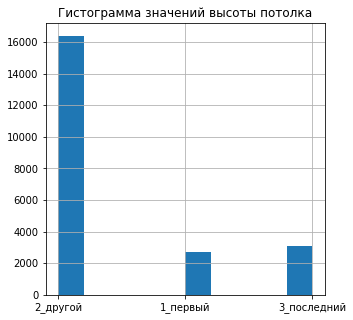

In [69]:
real_estate_correct_local['floor_type'].hist(figsize=(5, 5)).set(title='Гистограмма значений высоты потолка');

Из гистограммы видно, что количество квартир на первых и последних этажах практически одинаково. Пропущенных данных или аномальных значений нет.

**Проведем исследовательский анализ для столбца floors_total.**

count    22150.000000
mean        10.918014
std          6.626416
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

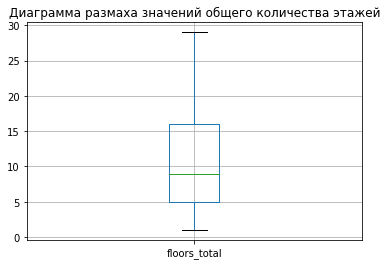

In [70]:
real_estate_correct_local.boxplot(column='floors_total', 
                                  showfliers=False
                                 ).set(title='Диаграмма размаха значений общего количества этажей')
real_estate_correct_local['floors_total'].describe()

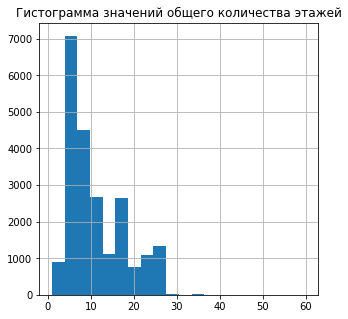

In [71]:
real_estate_correct_local['floors_total'].hist(bins=20, 
                                               figsize=(5, 5)
                                              ).set(title='Гистограмма значений общего количества этажей');

In [72]:
real_estate_correct_local = real_estate_correct_local.query('floors_total <= 28')

count    22118.000000
mean        10.881544
std          6.558261
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

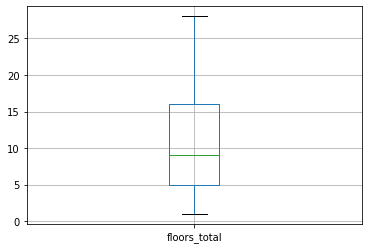

In [73]:
real_estate_correct_local.boxplot(column='floors_total')
real_estate_correct_local['floors_total'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу floors_total на значении 28 этажей (отсеев аномальных значений) медианное значение не меняется и остается на 9 этажах. 

**Проведем исследовательский анализ для столбца cityCenters_nearest.**

count    22118.000000
mean     11235.653224
std       9649.925246
min          0.000000
25%       3076.250000
50%      11657.500000
75%      15456.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

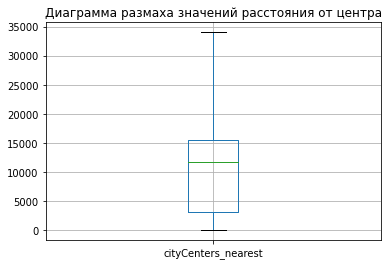

In [74]:
real_estate_correct_local.boxplot(column='cityCenters_nearest', showfliers=False
                                 ).set(title='Диаграмма размаха значений расстояния от центра')
real_estate_correct_local['cityCenters_nearest'].describe()

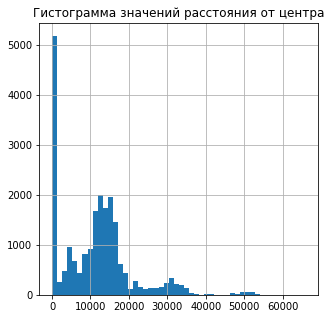

In [75]:
real_estate_correct_local['cityCenters_nearest'].hist(bins=50, 
                                               figsize=(5, 5)
                                              ).set(title='Гистограмма значений расстояния от центра');

In [76]:
real_estate_correct_local = real_estate_correct_local.query('cityCenters_nearest <= 37000')

count    21817.000000
mean     10706.771508
std       8575.180433
min          0.000000
25%       2733.000000
50%      11559.000000
75%      15255.000000
max      36998.000000
Name: cityCenters_nearest, dtype: float64

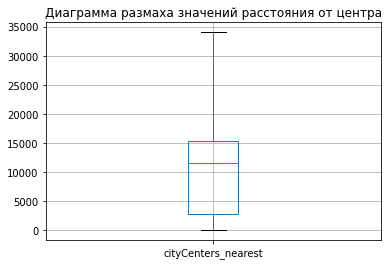

In [77]:
real_estate_correct_local.boxplot(column='cityCenters_nearest', showfliers=False
                                 ).set(title='Диаграмма размаха значений расстояния от центра')
real_estate_correct_local['cityCenters_nearest'].describe()

Из вышепреведенного анализа видно, что при установки потолка значений по столбцу cityCenters_nearest на значении 37 км (отсеев аномальных значений) медианное значение меняется с 11.7 км на 11.6 км. 

**Проведем исследовательский анализ для столбца parks_nearest.**

count    7250.000000
mean      496.920414
std       344.033437
min         1.000000
25%       293.000000
50%       458.000000
75%       618.750000
max      3190.000000
Name: parks_nearest, dtype: float64

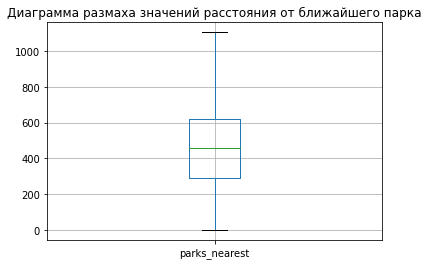

In [78]:
real_estate_correct_local.boxplot(column='parks_nearest', showfliers=False
                                 ).set(title='Диаграмма размаха значений расстояния от ближайшего парка')
real_estate_correct_local['parks_nearest'].describe()

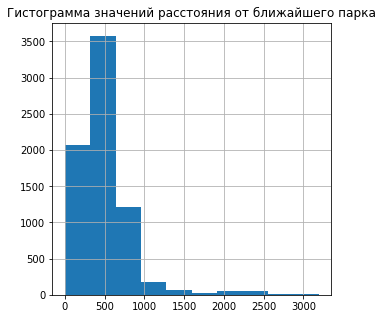

In [79]:
real_estate_correct_local['parks_nearest'].hist(figsize=(5, 5)).set(title='Гистограмма значений расстояния от ближайшего парка');

In [80]:
real_estate_correct_local['parks_nearest'].isnull().sum() / len(real_estate_correct_local['parks_nearest']) * 100

66.76903332263831

Из вышепреведенного анализа видно, что максимальное значение ограничивается на 3 км. Так же видно, что около 67% данных отсутствуют. Это нормально, т.к. по столбцу parks_around3000 стоит ограничение на 3 км и после этого значения программа не выдаёт удалленость парка от жилья, поэтому заполнять эти пропуски необязательно.

#### add new columns

***Создадим столбец price_per_mt и с округлением до двух знаков после запятой***

In [81]:
real_estate_correct_local['price_per_mt'] = round(real_estate_correct_local['last_price'] / 
                                                  real_estate_correct_local['total_area'], 
                                                  2
                                                 )

***Создадим столбец day_of_week_exposition. Также создадим столбцы с месяцем и годом публикации (month_exposition и year_exposition)***

In [82]:
real_estate_correct_local['day_of_week_exposition'] = real_estate_correct_local['first_day_exposition'].dt.weekday
real_estate_correct_local['month_exposition'] = pd.DatetimeIndex(real_estate_correct_local['first_day_exposition']).month
real_estate_correct_local['year_exposition'] = pd.DatetimeIndex(real_estate_correct_local['first_day_exposition']).year

***Создадим столбец cityCenters_nearest_km***

In [83]:
real_estate_correct_local['cityCenters_nearest_km'] = round(real_estate_correct_local['cityCenters_nearest'] / 1000).astype('int')

In [84]:
real_estate_correct_local.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,locality_clean_name,floor_type,price_per_mt,day_of_week_exposition,month_exposition,year_exposition,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,,Санкт-Петербург,2_другой,120370.37,3,3,2019,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,81.0,посёлок,Шушары,1_первый,82920.79,1,12,2018,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,574.0,558.0,,Санкт-Петербург,2_другой,92785.71,3,8,2015,14
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,NaN,55.0,городской посёлок,Янино-1,2_другой,95065.79,0,9,2018,0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,True,...,NaN,155.0,посёлок,Парголово,2_другой,99195.71,3,11,2017,19


#### check gap

In [85]:
# check
data = real_estate_correct_local.copy()

In [86]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21817 entries, 0 to 23439
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21817 non-null  int64         
 1   last_price              21817 non-null  float64       
 2   total_area              21817 non-null  float64       
 3   first_day_exposition    21817 non-null  datetime64[ns]
 4   rooms                   21817 non-null  int64         
 5   ceiling_height          21817 non-null  float64       
 6   floors_total            21817 non-null  int64         
 7   living_area             21817 non-null  float64       
 8   floor                   21817 non-null  int64         
 9   is_apartment            21817 non-null  bool          
 10  studio                  21817 non-null  bool          
 11  open_plan               21817 non-null  bool          
 12  kitchen_area            21817 non-null  float64    

In [87]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'median', 'max'])   
#     .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,21817.0,21817.00,21817.00,19022.0,21817.0,21817.0,21817.0,21817.0,21817.0
min,0.0,20.00,2.40,1.0,1000000.0,10.0,5.0,1.0,1.0
median,2.0,51.00,2.65,93.0,4600000.0,30.0,9.0,4.0,9.0
max,6.0,238.26,3.50,1580.0,25000000.0,100.0,40.0,27.0,28.0


In [88]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [89]:
# check
df_check.rooms.value_counts().to_frame()

,count
rooms,
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12


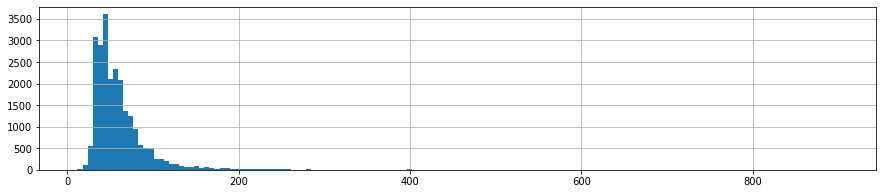

In [90]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

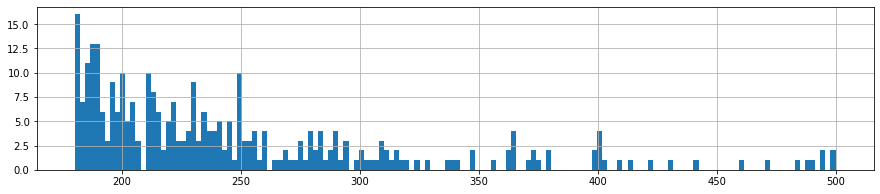

In [91]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

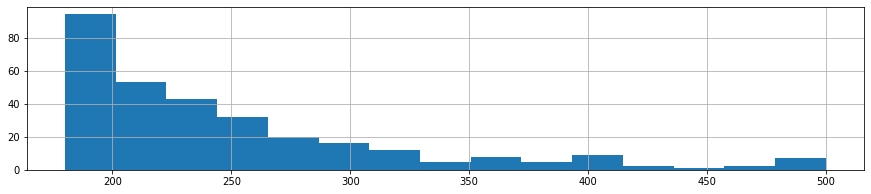

In [92]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

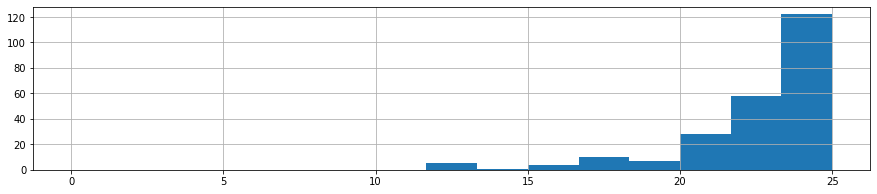

In [93]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

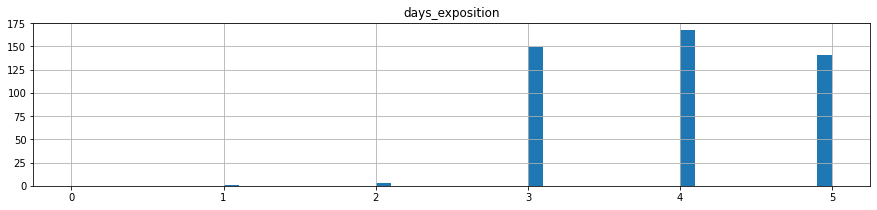

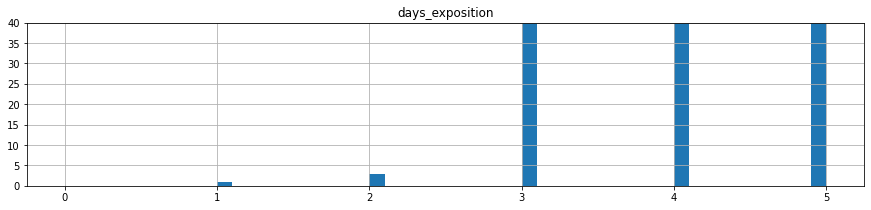

In [94]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [95]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
#     .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.0,21.90000,2.45,3.0000,1050000.0,10.000,5.00000,1.0,2.0
0.0100,1.0,26.00000,2.50,4.0000,1300000.0,13.400,5.00000,1.0,2.0
0.5000,2.0,51.00000,2.65,93.0000,4600000.0,30.000,9.00000,4.0,9.0
0.9900,4.0,134.58400,3.31,1054.7900,19000000.0,80.168,27.48400,23.0,26.0
0.9988,5.0,184.24624,3.50,1362.1748,24499820.8,96.000,37.68208,26.0,27.0


#### check

***Проведем исследовательский анализ для столбца days_exposition.***

count    19022.000000
mean       176.880034
std        215.933318
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

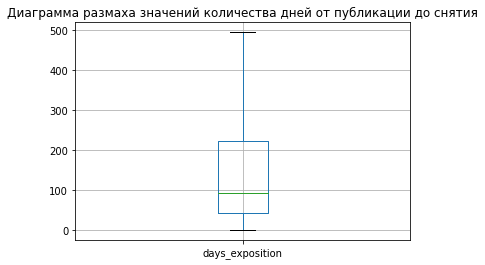

In [96]:
real_estate_correct_local.boxplot(column='days_exposition', showfliers=False
                                 ).set(title='Диаграмма размаха значений количества дней от публикации до снятия')
real_estate_correct_local['days_exposition'].describe()

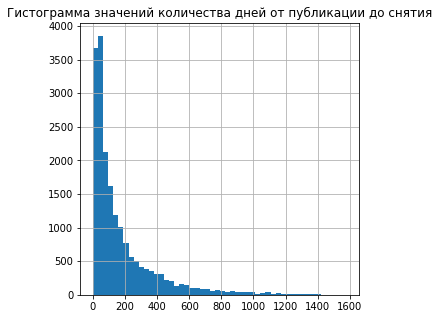

In [97]:
real_estate_correct_local['days_exposition'].hist(bins=50, 
                                               figsize=(5, 5)
                                              ).set(title='Гистограмма значений количества дней от публикации до снятия');

Из вышепреведенного анализа видно, что медианное значение равно 93 дня и среднее значение равно 177 дня. Аномально быстрыми продажами можно считать квартиры, которые продавались менее чем за 45 дней, а долгими, которые более чем 224 дней.

In [98]:
real_estate_correct_local.groupby('year_exposition')['days_exposition'].mean().astype('int')

year_exposition
2014    919
2015    647
2016    317
2017    157
2018     93
2019     30
Name: days_exposition, dtype: int64

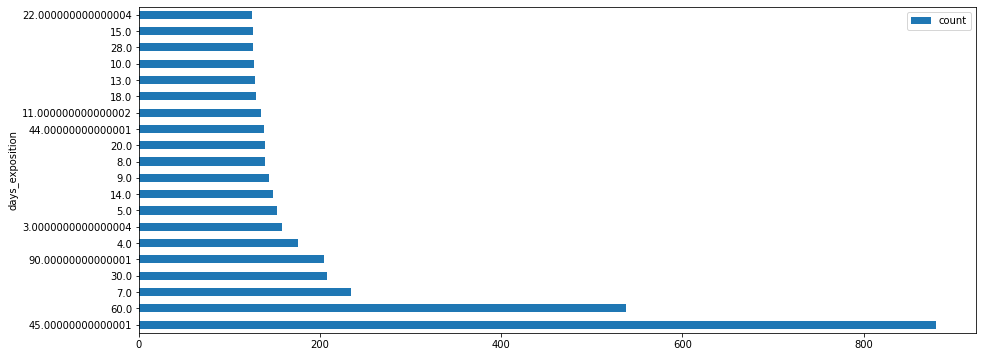

In [99]:
# check
# Моды на сырых данных
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

# example 1

***Проанализируем факторы, которые влияют на стоимость объекта. Изучим зависимость стоимости от общей площади.***

0.768706883962511

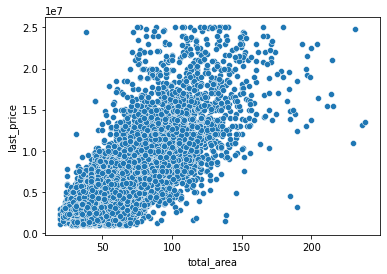

In [100]:
sns.scatterplot(x=real_estate_correct_local.total_area, y=real_estate_correct_local.last_price)
real_estate_correct_local['last_price'].corr(real_estate_correct_local['total_area'])

Из вышеизложенного анализа видно, что стоимость жилья увеличивается с увеличением его общей площади. Коэффициент кореляции равен 0.767, что означает практически прямую зависимость стоимости жилья от его общей площади.

**Изучим зависимость стоимости от жилой площади.**

0.6109438995339646

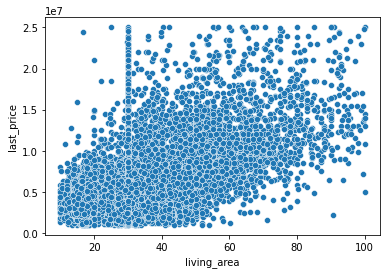

In [101]:
sns.scatterplot(x=real_estate_correct_local.living_area, y=real_estate_correct_local.last_price)
real_estate_correct_local['last_price'].corr(real_estate_correct_local['living_area'])

Из вышеизложенного анализа видно, что стоимость жилья увеличивается с увеличением его жилой площади, но эта зависимость выражена слабее, чем от общей площади. Коэффициент кореляции равен 0.611, что означает зависимость стоимости жилья от его жилой площади слабее, чем от общей площади.

**Изучим зависимость стоимости от площади кухни.**

0.5484094804454532

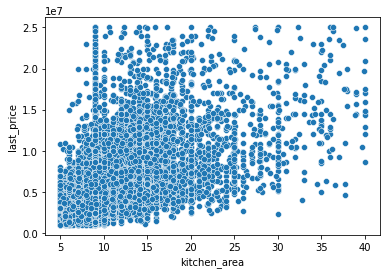

In [102]:
sns.scatterplot(x=real_estate_correct_local.kitchen_area, y=real_estate_correct_local.last_price)
real_estate_correct_local['last_price'].corr(real_estate_correct_local['kitchen_area'])

Из вышеизложенного анализа видно, что стоимость жилья увеличивается с увеличением площади кухни, но эта зависимость выражена слабее, чем от жилой площади. Коэффициент кореляции равен 0.548, что означает зависимость стоимости жилья от площади его кухни слабее, чем от жилой площади.

**Изучим зависимость стоимости от количества комнат.**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

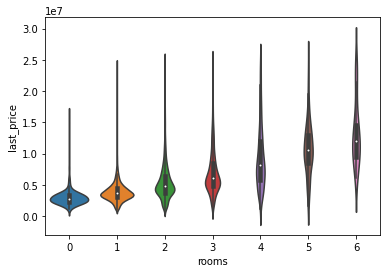

In [103]:
sns.violinplot(
    x=real_estate_correct_local['rooms'],
    y=real_estate_correct_local['last_price'],
    order=[0, 1, 2, 3, 4, 5, 6]
    )

In [104]:
real_estate_correct_local.groupby('rooms')['last_price'].mean()

rooms
0    3.014185e+06
1    3.864378e+06
2    5.450031e+06
3    7.164965e+06
4    9.347097e+06
5    1.077386e+07
6    1.323910e+07
Name: last_price, dtype: float64

Из вышеизложенного анализа видно, что жильё, в котором 6 комнат, стоит дороже, чем с другим количеством комнат, а студии дешевле. Среднее значение для: студии - 3.01 млн; 1 комнаты - 3.86 млн; 2 комнат - 5.45 млн; 3 комнат - 7.17 млн; 4 комнат - 9.35 млн; 5 комнаты - 10.77 млн; 6 комнат - 13.24 млн.

**Изучим зависимость стоимости от этажа.**

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

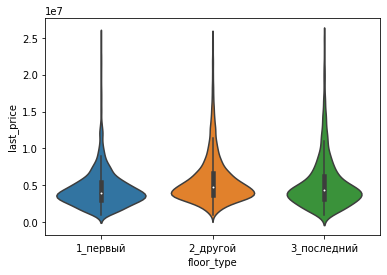

In [105]:
sns.violinplot(
    x=real_estate_correct_local['floor_type'],
    y=real_estate_correct_local['last_price'],
    order=['1_первый', '2_другой', '3_последний']
    )

In [106]:
real_estate_correct_local.groupby('floor_type')['last_price'].mean()

floor_type
1_первый       4.541847e+06
2_другой       5.730871e+06
3_последний    5.268661e+06
Name: last_price, dtype: float64

Из вышеизложенного анализа видно, что жильё, которое располагается на первых этажах, стоит дешевле, чем на последнем и других этажах. Дороже всех стоит жильё на других этажах. Среднее значение для: первых этажей - 4.54 млн; последних - 5.27 млн; других - 5.73 млн.

**Изучим зависимость стоимости от даты размещения.**

*От дня недели*

<AxesSubplot:xlabel='day_of_week_exposition', ylabel='last_price'>

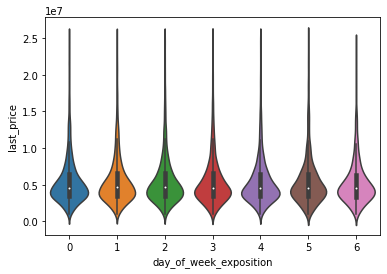

In [107]:
sns.violinplot(
    x=real_estate_correct_local['day_of_week_exposition'],
    y=real_estate_correct_local['last_price'],
    order=[0, 1, 2, 3, 4, 5, 6]
    )

In [108]:
real_estate_correct_local.groupby('day_of_week_exposition')['last_price'].mean()

day_of_week_exposition
0    5.500319e+06
1    5.570610e+06
2    5.565953e+06
3    5.591254e+06
4    5.491115e+06
5    5.422973e+06
6    5.378160e+06
Name: last_price, dtype: float64

Из вышеизложенного анализа видно, что жильё, которое продавалось в четверг стоило дороже, чем в остальные дни недели, а в воскресенье дешевле. Средние значения для: понедельника - 5.5 млн; вторника - 5.57 млн; среды - 5.57 млн; четверг - 5.59 млн; пятница - 5.49 млн; суббота - 5.42 млн; воскресенье - 5.38 млн.

*От месяца*

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

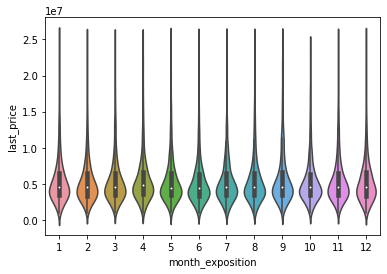

In [109]:
sns.violinplot(
    x=real_estate_correct_local['month_exposition'],
    y=real_estate_correct_local['last_price'],
    order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    )

In [110]:
real_estate_correct_local.groupby('month_exposition')['last_price'].mean()

month_exposition
1     5.566427e+06
2     5.532482e+06
3     5.505819e+06
4     5.606407e+06
5     5.494981e+06
6     5.285790e+06
7     5.466107e+06
8     5.497575e+06
9     5.676212e+06
10    5.437333e+06
11    5.618469e+06
12    5.530899e+06
Name: last_price, dtype: float64

Из вышеизложенного анализа видно, что жильё, которое продавалось в сентябре стоило дороже, чем в остальные месяца, а в июне дешевле. Средние значения для: января - 5.57 млн; февраля - 5.53 млн; марта - 5.51 млн; апреля - 5.61 млн; мая - 5.5 млн; июня - 5.29 млн; июля - 5.47 млн; августа - 5.5 млн; сентября - 5.68 млн; октября - 5.44 млн; ноября - 5.62 млн; декабря - 5.53 млн.

*От года*

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

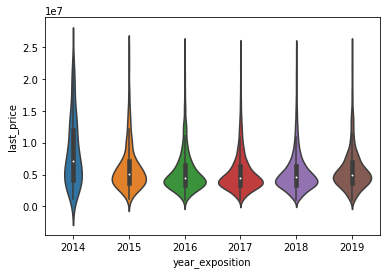

In [111]:
sns.violinplot(
    x=real_estate_correct_local['year_exposition'],
    y=real_estate_correct_local['last_price'],
    order=[2014, 2015, 2016, 2017, 2018, 2019]
    )

In [112]:
real_estate_correct_local.groupby('year_exposition')['last_price'].mean()

year_exposition
2014    8.491854e+06
2015    6.121163e+06
2016    5.508951e+06
2017    5.404611e+06
2018    5.413725e+06
2019    5.840543e+06
Name: last_price, dtype: float64

Из вышеизложенного анализа видно, что жильё, которое продавалось в 2014 стоило дороже, чем в остальные года, а в 2017 дешевле. Средние значения для: 2014 - 8.49 млн; 2015 - 6.12 млн; 2016 - 5.51 млн; 2017 - 5.41 млн; 2018 - 5.41 млн; 2019 - 5.84 млн.

In [113]:
_real_estate_correct_local_pivot_by_year = real_estate_correct_local.pivot_table(index='year_exposition',
                                                                                 values=['last_price', 'total_area'],
                                                                                 aggfunc=['count', 'mean']
                                                                                )
del _real_estate_correct_local_pivot_by_year[('count', 'last_price')]
_real_estate_correct_local_pivot_by_year = _real_estate_correct_local_pivot_by_year.rename(columns={'count': 'count_of_adv'})
_real_estate_correct_local_pivot_by_year[('mean', 'total_area')] = round(_real_estate_correct_local_pivot_by_year[('mean', 
                                                                                                                  'total_area'
                                                                                                               )
                                                                                                              ],
                                                                       2
                                                                      )
_real_estate_correct_local_pivot_by_year

count_of_adv          mean           
                  total_area    last_price total_area
year_exposition                                      
2014                     115  8.491854e+06      75.81
2015                    1036  6.121163e+06      62.53
2016                    2526  5.508951e+06      57.82
2017                    7574  5.404611e+06      56.41
2018                    7904  5.413725e+06      55.36
2019                    2662  5.840543e+06      55.59

#### check

**Посчитаем среднюю стоимость кв.метра в населенных пунктах.**

In [114]:
_real_estate_correct_local_pivot_by_local = real_estate_correct_local.pivot_table(index='locality_clean_name',
                                                                                 values='price_per_mt',
                                                                                 aggfunc=['count', 'mean']
                                                                                )
_real_estate_correct_local_pivot_by_local = _real_estate_correct_local_pivot_by_local.rename(columns={'count': 'count_of_adv',
                                                                                                    'mean': 'mean_price_per_mt',
                                                                                                    'price_per_mt': ''
                                                                                                   }
                                                                                          )
_real_estate_correct_local_pivot_by_local['mean_price_per_mt'] = round(_real_estate_correct_local_pivot_by_local['mean_price_per_mt'],
                                                                       2
                                                                      )

In [115]:
_real_estate_correct_local_pivot_by_local = _real_estate_correct_local_pivot_by_local.sort_values(by='count_of_adv', 
                                                                                                  ascending=False
                                                                                                 ).head(10)
_real_estate_correct_local_pivot_by_local

,count_of_adv,mean_price_per_mt
,,
locality_clean_name,,
Санкт-Петербург,14686,109366.43
Мурино,574,86051.82
Кудрово,468,95353.04
Шушары,434,78504.19
Всеволожск,386,68783.58
Пушкин,349,102007.05
Колпино,334,75247.31
Парголово,324,90403.29


Самое большое количество объявлений было выложено в Санкт-Петербурге - 14 686 шт. Средняя стоимость за метр в Петербурге составляет 109 366.43. 

<AxesSubplot:xlabel='locality_clean_name'>

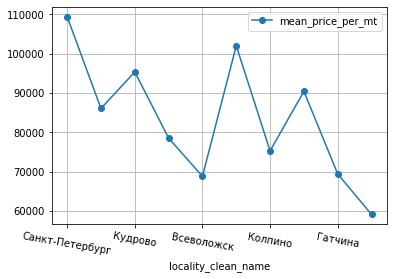

In [116]:
_real_estate_correct_local_pivot_by_local.plot(y='mean_price_per_mt', rot=-10, style='o-', grid=True)

In [117]:
_real_estate_correct_local_pivot_by_local.sort_values(by='mean_price_per_mt', ascending=False).head(10)

,count_of_adv,mean_price_per_mt
,,
locality_clean_name,,
Санкт-Петербург,14686,109366.43
Пушкин,349,102007.05
Кудрово,468,95353.04
Парголово,324,90403.29
Мурино,574,86051.82
Шушары,434,78504.19
Колпино,334,75247.31
Гатчина,270,69386.78


Самая большая средняя стоимость за квадрат в Петербурге - 109 366.43.

In [118]:
_real_estate_correct_local_pivot_by_local.sort_values(by='mean_price_per_mt').head(10)

,count_of_adv,mean_price_per_mt
,,
locality_clean_name,,
Выборг,202,59082.49
Всеволожск,386,68783.58
Гатчина,270,69386.78
Колпино,334,75247.31
Шушары,434,78504.19
Мурино,574,86051.82
Парголово,324,90403.29
Кудрово,468,95353.04


Самая маленькая средняя стоимость за квадрат в Выборге - 59 082.49.

**Определим среднюю стоимость жилья в Петербурге при удалении от центра.**

In [119]:
_real_estate_correct_local_St_Pb = real_estate_correct_local.query('locality_clean_name == "Санкт-Петербург"')
_real_estate_correct_local_St_Pb = _real_estate_correct_local_St_Pb.pivot_table(index='cityCenters_nearest_km',
                                                                                 values='price_per_mt',
                                                                                 aggfunc=['count', 'mean']
                                                                                )
_real_estate_correct_local_St_Pb = _real_estate_correct_local_St_Pb.rename(columns={'count': 'count_of_adv',
                                                                                                    'mean': 'mean_price_per_mt',
                                                                                                    'price_per_mt': ''
                                                                                                   }
                                                                                          )
_real_estate_correct_local_St_Pb['mean_price_per_mt'] = round(_real_estate_correct_local_St_Pb['mean_price_per_mt'], 2)
_real_estate_correct_local_St_Pb.sort_values(by='mean_price_per_mt', ascending=False)

,count_of_adv,mean_price_per_mt
,,
cityCenters_nearest_km,,
27,2,132115.71
5,747,129954.36
1,136,129200.58
6,495,129161.22
7,344,127779.97
2,215,126931.87
0,57,126766.65
4,556,123322.88


<AxesSubplot:xlabel='cityCenters_nearest_km'>

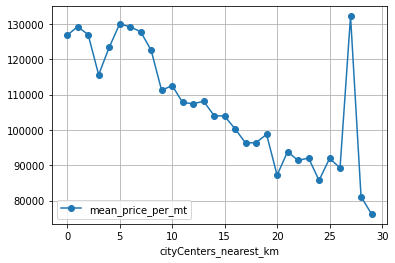

In [120]:
_real_estate_correct_local_St_Pb.plot(y='mean_price_per_mt', style='o-', grid=True)

Из вышеприведенного анализа следует:
1. При расстоянии от центра Петербурга до 5 км от его удаления видно, что средняя стоимость объекта за кв.м не уменьшается, а наоборот возрастает. Это вызвано тем, что, скорее всего, на этом удалении находятся объекты повышенной комфортности, которые расположены недалеко от центра;
2. При нахождении объектов от 5 до 20 км от центра Петербурга видно, что средняя стоимость за кв.м уменьшается;
3. При нахождении объектов от 20 до 25 км от центра Петербурга видно, что средняя стоимость за кв.м колеблится около 90 тыс за кв.м;
4. При нахождении объектов от 25 до 29 км от центра Петербурга видно, что средняя стоимость за кв.м уменьшается;
5. При нахождении объектов от 27 км от центра Петербурга, видно, что средняя стоимость за кв.м больше, чем в самом центре (132115.71). Это похоже на вбросы, т.к. количество объявлений в этой локации всего 2.

In [121]:
_real_estate_correct_local_St_Pb = real_estate_correct_local.query('locality_clean_name == "Санкт-Петербург"')
_real_estate_correct_local_St_Pb = _real_estate_correct_local_St_Pb.pivot_table(index='cityCenters_nearest_km',
                                                                                 values='last_price',
                                                                                 aggfunc=['count', 'mean']
                                                                                )
_real_estate_correct_local_St_Pb = _real_estate_correct_local_St_Pb.rename(columns={'count': 'count_of_adv',
                                                                                                    'mean': 'mean_last_price',
                                                                                                    'last_price': ''
                                                                                                   }
                                                                                          )
_real_estate_correct_local_St_Pb['mean_last_price'] = round(_real_estate_correct_local_St_Pb['mean_last_price'], 2)
_real_estate_correct_local_St_Pb.sort_values(by='mean_last_price', ascending=False)

,count_of_adv,mean_last_price
,,
cityCenters_nearest_km,,
1,136,10436691.17
2,215,10055218.60
5,747,9809694.37
4,556,9379383.07
3,279,8985115.41
6,495,8720174.83
7,344,8484236.58
8,560,8324454.93


<AxesSubplot:xlabel='cityCenters_nearest_km'>

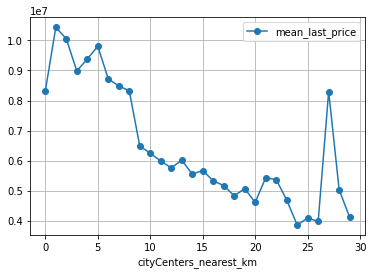

In [122]:
_real_estate_correct_local_St_Pb.plot(y='mean_last_price', style='o-', grid=True)

<AxesSubplot:xlabel='cityCenters_nearest_km'>

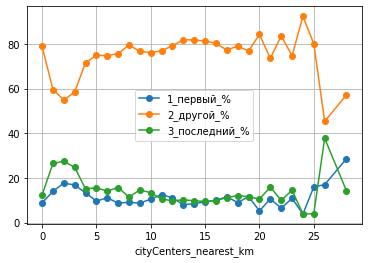

In [123]:
_real_estate_correct_local_St_Pb_floor_type1 = real_estate_correct_local.query('locality_clean_name == "Санкт-Петербург" and floor_type == "1_первый"').groupby('cityCenters_nearest_km')['floor_type'].count()
_real_estate_correct_local_St_Pb_floor_type2 = real_estate_correct_local.query('locality_clean_name == "Санкт-Петербург" and floor_type == "2_другой"').groupby('cityCenters_nearest_km')['floor_type'].count()
_real_estate_correct_local_St_Pb_floor_type3 = real_estate_correct_local.query('locality_clean_name == "Санкт-Петербург" and floor_type == "3_последний"').groupby('cityCenters_nearest_km')['floor_type'].count()
_real_estate_correct_local_St_Pb_floor_type1.name = "1_первый"
_real_estate_correct_local_St_Pb_floor_type2.name = "2_другой"
_real_estate_correct_local_St_Pb_floor_type3.name = "3_последний"
_real_estate_correct_local_St_Pb_floor_type = pd.concat([_real_estate_correct_local_St_Pb_floor_type1,
                                                        _real_estate_correct_local_St_Pb_floor_type2,
                                                        _real_estate_correct_local_St_Pb_floor_type3
                                                        ]
                                                        , axis=1 
                                                       )

_real_estate_correct_local_St_Pb_floor_type['1_первый_%'] = _real_estate_correct_local_St_Pb_floor_type['1_первый'] * 100 / (_real_estate_correct_local_St_Pb_floor_type['1_первый'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['2_другой'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['3_последний']) 
_real_estate_correct_local_St_Pb_floor_type['2_другой_%'] = _real_estate_correct_local_St_Pb_floor_type['2_другой'] * 100 / (_real_estate_correct_local_St_Pb_floor_type['1_первый'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['2_другой'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['3_последний']) 
_real_estate_correct_local_St_Pb_floor_type['3_последний_%'] = _real_estate_correct_local_St_Pb_floor_type['3_последний'] * 100 / (_real_estate_correct_local_St_Pb_floor_type['1_первый'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['2_другой'] + 
                                                                                                                            _real_estate_correct_local_St_Pb_floor_type['3_последний']) 
_real_estate_correct_local_St_Pb_floor_type
_real_estate_correct_local_St_Pb_floor_type.plot(y=['1_первый_%', '2_другой_%','3_последний_%'], style='o-', grid=True)

### Напишите общий вывод

**Выводы, которые выделены таким образом, относятся к выводам про обработку данных**

*Выводы, которые выделены таким образом, относятся к выводам сделанным на основании обработанных данных*


**Пропуски есть в следующих столбцах:**

ceiling_height - скорее всего, владелец квартиры просто не указал. Пропущенных данных почти 39%, это очень большое количество данных. Логично заменить невозможно;

floors_total - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 1%, это небольшое количество данных. Логично заменить невозможно;

living_area - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 8%, это небольшое количество данных. Логично заменить невозможно;

is_apartment - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 88%, это критическое количество данных. Возможно заменить на значение True;

kitchen_area - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 9,5%, это небольшое количество данных. Логично заменить невозможно;

balcony - скорее всего, владелец квартиры не указал из-за того, что балкона нет. Пропущенных данных почти 49%, это очень большое количество данных. Заменим пропушенные значения на 0;

locality_name - скорее всего, владелец квартиры просто не указал. Пропущенных данных около 1%, это небольшое количество данных. Логично заменить невозможно;

airports_nearest - скорее всего, владелец квартиры не указал из-за того, что аэропорта рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Замена значения NaN не имеет смысла;

cityCenters_nearest - скорее всего, владелец квартиры не указал из-за того, что квартира находится в центре. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

parks_around3000 - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

parks_nearest - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных почти 66%, это очень большое количество данных. Замена значения NaN не имеет смысла, т.к. из названия столбца parks_around3000 видно, что парк находится на расстоянии более 3 км и поэтому данных нет;

ponds_around3000 - скорее всего, владелец квартиры не указал из-за того, что пруда рядом нет. Пропущенных данных около 23%, это очень большое количество данных. Заменим пропущенные значения на 0.

ponds_nearest - скорее всего, владелец квартиры не указал из-за того, что парка рядом нет. Пропущенных данных почти 62%, это очень большое количество данных. Замена значения NaN не имеет смысла, т.к. из названия столбца ponds_around3000 видно, что парк находится на расстоянии более 3 км и поэтому данных нет;

days_exposition - скорее всего, данны некорректно перенеслись в архив. Количество таких пропусков около 13%. Логичной замены нет.


**Некорректно отображается тип данных по столбцам first_day_exposition, floors_total, parks_around3000 и ponds_around3000. Присвоим этим столбцам корректные типы данных:**

first_day_exposition - формат даты, т.к. там записана дата;

floors_total - формат целого числа, т.к. пол этажа не может быть;

parks_around3000 - формат целого числа, т.к. количество парков не может быть десятичным числом;

ponds_around3000 - формат целого числа, т.к. количество прудов не может быть десятичным числом.


**При анализе данных по столбцу total_area видно, что при установки ограничения на значении 250 м2 (отсеев аномальные значения) медианное значение 52 м2.**


**При анализе данных по столбцу living_area видно, что при установки ограничений на значениях 10 м2 и 100 м2 (отсеев аномальных значений) медианное значение не меняется и остается на 30 м2.**


**При анализе данных по столбцу kitchen_area видно, что при установки ограничений на значениях 5 м2 и 40 м2 (отсеев аномальных значений) медианное значение не меняется и остается на 9 м2. Далее заполняем пропуски медианными значением получаем вышеприведенное распределение.**


**При анализе данных по столбцу last_price видно, что при установки ограничений на значениях 1 млн и 25 млн (отсеев аномальных значений) медианное значение 4.6 млн.**


**При анализе данных по столбцу rooms видно, что при количестве комнат больше 6, поэтому отсеем эти значения. Медианное значение равно 2.**


**При анализе данных по столбцу ceiling_height видно, что при установки ограничений на значениях 2.4 м и 3.5 м (отсеев аномальных значений) медианное значение не меняется и остается на 2.65 м. Далее заполняем пропуски медианными значением получаем вышеприведенное распределение.**


**При анализе данных по столбцу floor_type видно, что количество квартир на первых и последних этажах практически одинаково. Пропущенных данных или аномальных значений нет."


**При анализе данных по столбцу floors_total видно, что при установки ограниченияна значении 28 этажей (отсеев аномальных значений) медианное значение не меняется и остается на 9 этажах.**


**При анализе данных по столбцу cityCenters_nearest видно, что при установки ограничений на значении 37 км (отсеев аномальных значений) медианное значение меняется с 11.7 км на 11,6 км.**


**При анализе данных по столбцу parks_nearest видно, что максимальное значение ограничивается на 3 км. Так же видно, что около 67% данных отсутствуют. Это нормально, т.к. по столбцу parks_around3000 стоит ограничение на 3 км и после этого значения программа не выдаёт удалленость парка от жилья, поэтому заполнять эти пропуски необязательно.**


*При анализе данных по столбцу days_exposition видно, что медианное значение равно 93 дня и среднее значение равно 177 дня. Аномально быстрыми продажами можно считать квартиры, которые продавались менее чем за 45 дней, а долгими, которые более чем 224 дней.*


*При анализе данных по общей площади видно, что стоимость жилья увеличивается с увеличением его общей площади. Коэффициент кореляции равен 0.767, что означает практически прямую зависимость стоимости жилья от его общей площади.*


*При анализе данных по жилой площади видно, что стоимость жилья увеличивается с увеличением его жилой площади, но эта зависимость выражена слабее, чем от общей площади. Коэффициент кореляции равен 0.611, что означает зависимость стоимости жилья от его жилой площади слабее, чем от общей площади.*


*При анализе данных по площади кухни видно, что стоимость жилья увеличивается с увеличением площади кухни, но эта зависимость выражена слабее, чем от жилой площади. Коэффициент кореляции равен 0.548, что означает зависимость стоимости жилья от площади его кухни слабее, чем от жилой площади.*


*При анализе данных по количеству комнат, что жильё, в котором 6 комнат, стоит дороже, чем с другим количеством комнат, а студии дешевле. Среднее значение для: студии - 3.01 млн; 1 комнаты - 3.86 млн; 2 комнат - 5.45 млн; 3 комнат - 7.17 млн; 4 комнат - 9.35 млн; 5 комнаты - 10.77 млн; 6 комнат - 13.24 млн.*


*При анализе данных по типу этажа видно, что жильё, которое располагается на первых этажах, стоит дешевле, чем на последнем и других этажах. Дороже всех стоит жильё на других этажах. Среднее значение для: первых этажей - 4.54 млн; последних - 5.27 млн; других - 5.73 млн.*


*При анализе данных по дате выставления объявления (день недели) видно, что жильё, которое продавалось в четверг стоило дороже, чем в остальные дни недели, а в воскресенье дешевле. Средние значения для: понедельника - 5.5 млн; вторника - 5.57 млн; среды - 5.57 млн; четверг - 5.59 млн; пятница - 5.49 млн; суббота - 5.42 млн; воскресенье - 5.38 млн.*


*При анализе данных по дате выставления объявления (месяц) видно, что жильё, которое продавалось в сентябре стоило дороже, чем в остальные месяца, а в июне дешевле. Средние значения для: января - 5.57 млн; февраля - 5.53 млн; марта - 5.51 млн; апреля - 5.61 млн; мая - 5.5 млн; июня - 5.29 млн; июля - 5.47 млн; августа - 5.5 млн; сентября - 5.68 млн; октября - 5.44 млн; ноября - 5.62 млн; декабря - 5.53 млн.*


*При анализе данных по дате выставления объявления (год) видно, что жильё, которое продавалось в 2014 стоило дороже, чем в остальные года, а в 2017 дешевле. Средние значения для: 2014 - 5.14 млн; 2015 - 4.79 млн; 2016 - 4.56 млн; 2017 - 4.52 млн; 2018 - 4.6 млн; 2019 - 4.93 млн.*


*Самое большое количество объявлений было выложено в Санкт-Петербурге - 14 686 шт. Средняя стоимость за метр в Петербурге составляет 109 06.36.*


*Самая большая средняя стоимость за квадрат в Петербурге - 109 366.43.*


*Самая маленькая средняя стоимость за квадрат в Выборге - 59 082.49.*


*При анализе объектов в Петербурге (зависимость удаленности объекта от средней стоимости за кв.м) следует:*
1. При расстоянии от центра Петербурга до 5 км от его удаления видно, что средняя стоимость объекта за кв.м не уменьшается, а наоборот возрастает. Это вызвано тем, что, скорее всего, на этом удалении находятся объекты повышенной комфортности, которые расположены недалеко от центра;
2. При нахождении объектов от 5 до 20 км от центра Петербурга видно, что средняя стоимость за кв.м уменьшается;
3. При нахождении объектов от 20 до 25 км от центра Петербурга видно, что средняя стоимость за кв.м колеблится около 90 тыс за кв.м;
4. При нахождении объектов от 25 до 29 км от центра Петербурга видно, что средняя стоимость за кв.м уменьшается;
5. При нахождении объектов от 27 км от центра Петербурга, видно, что средняя стоимость за кв.м больше, чем в самом центре (132 115.71). Это похоже на вбросы, т.к. количество объявлений в этой локации всего 2.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.